In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)
T = 1 # time length
N = 252 # number of steps
S_0 = 100 # initial stock price
K = 90 # strike price
r = 0 # expected return rate = risk-free rate in risk-neutral world
sigma = 0.3 # volatility

## 1. Simulate Brownian Motion

In [3]:
def simulate_BM(T, N):
    # T: time length (positive integer)
    # N: number of steps (positive integer)
    b = np.array([0])
    mu, sigma = 0, math.sqrt(T / N) # mean and standard deviation different from the global r and sigma
    s = np.append(0, np.random.normal(mu, sigma, N))
    return np.cumsum(s)

Text(0.5, 1.0, 'Brownian Motion')

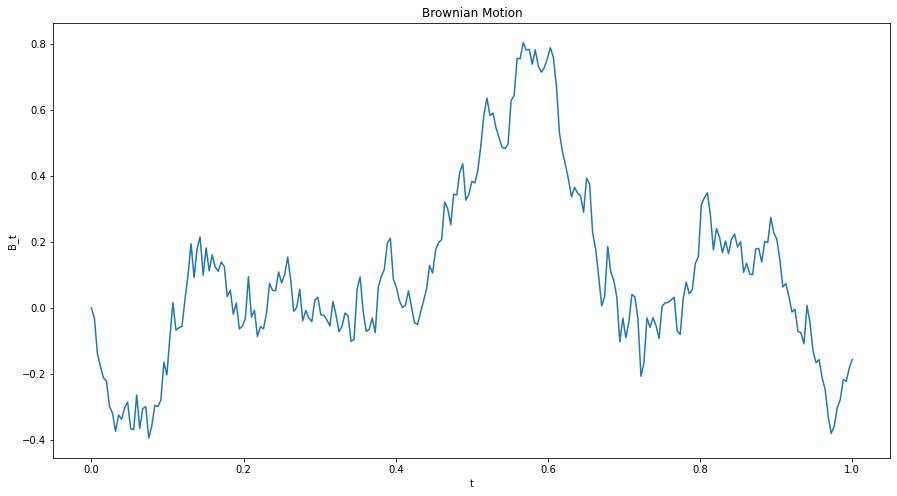

In [36]:
B = simulate_BM(1, N)
t = np.linspace(0, 1, N + 1)
plt.figure(figsize=(15,8))
plt.plot(t, B)
plt.ylabel("B_t")
plt.xlabel("t")
plt.title("Brownian Motion")

## 2. Simulate Stock Prices using Geometric Brownian Motion

$S_t = S_0 \exp{((r - \sigma^2 / 2) t + \sigma B_t)}$

Text(0.5, 1.0, 'Stock Prices with Geometric Brownian Motion')

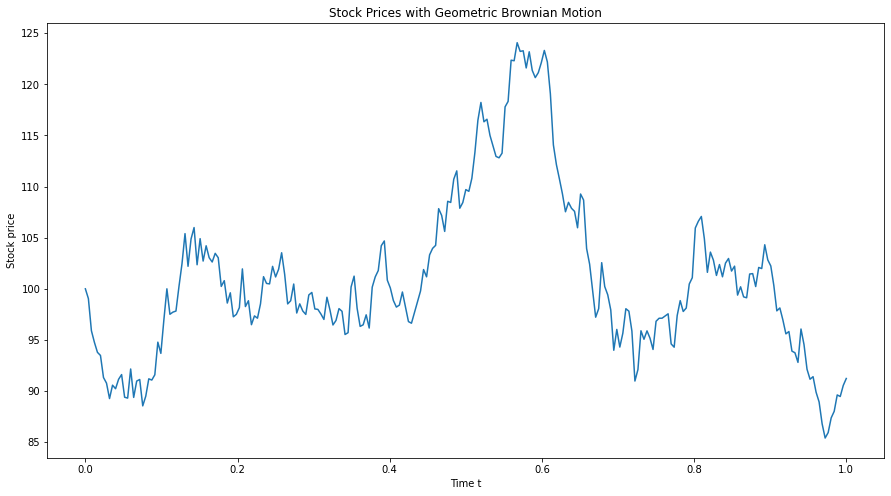

In [37]:
S = np.zeros(len(B))
for x in range(len(B)):
    S[x] = S_0 * math.exp((r - 1 / 2 * sigma ** 2) * t[x] + sigma * B[x])
plt.figure(figsize=(15,8))
plt.plot(t, S)
plt.ylabel("Stock price")
plt.xlabel("Time t")
plt.title("Stock Prices with Geometric Brownian Motion")

## 3. Monte Carlo Simulation for Stock Price and Option Pricing

In [123]:
def MCS_regular_option_pricing(S_0, K, r, T, sigma, option_type, M):
    '''
    S_0: stock price at time 0
    K: strike price
    r: risk-free rate
    T: maturity date
    sigma: volatility
    M: number of trails of MCS
    option type: "call" or "put"
    '''
    B_Ts = np.random.normal(0, T, M)
    S_Ts = S_0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * B_Ts)
    payoffs = np.maximum(S_Ts - K, np.zeros(M)) if option_type == "call" else np.maximum(K - S_Ts, np.zeros(M))
    return np.exp(-1 * r * T) * np.mean(payoffs)

### 3.1 Call Option

call price:  17.017491944182662


Text(0.5, 1.0, 'Price convergence of Monte Carlo Simulation')

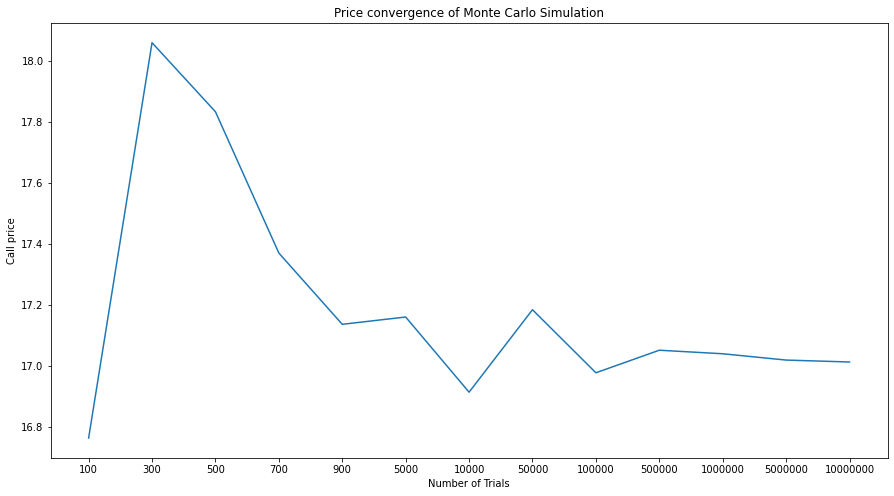

In [124]:
number_of_simulations = list(range(100, 1000, 200)) + [5000, 10000, 50000, 100000, 500000, 1000000, 5000000, 10000000]
call_prices = [MCS_regular_option_pricing(S_0, K, r, T, sigma, "call", x) for x in number_of_simulations]
print("call price: ", np.average(call_prices, weights = number_of_simulations ))
plt.figure(figsize=(15,8))
number_of_simulations = [str(x) for x in number_of_simulations]
plt.plot(number_of_simulations, call_prices)
plt.ylabel("Call price")
plt.xlabel("Number of Trials")
plt.title("Price convergence of Monte Carlo Simulation")

### 3.2 Put Option

put price:  7.01524138628541


Text(0.5, 1.0, 'Price convergence of Monte Carlo Simulation')

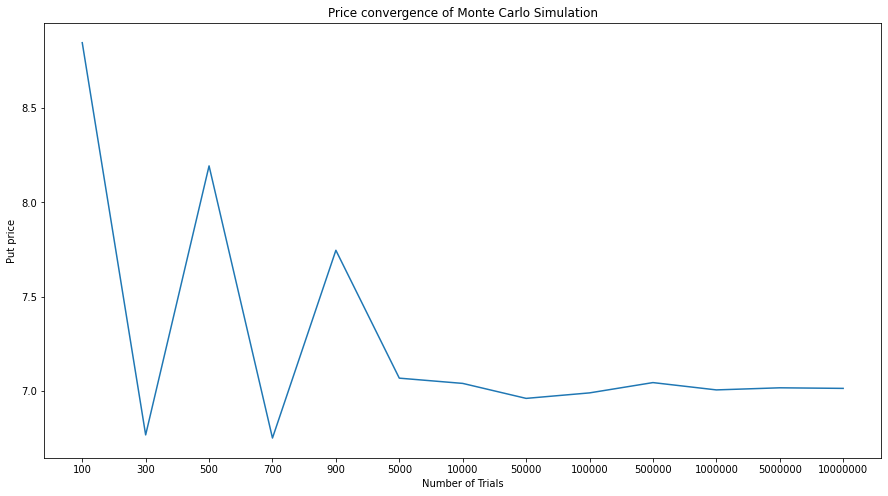

In [125]:
number_of_simulations = list(range(100, 1000, 200)) + [5000, 10000, 50000, 100000, 500000, 1000000, 5000000, 10000000]
put_prices = [MCS_regular_option_pricing(S_0, K, r, T, sigma, "put", x) for x in number_of_simulations]
print("put price: ", np.average(put_prices, weights = number_of_simulations ))
plt.figure(figsize=(15,8))
number_of_simulations = [str(x) for x in number_of_simulations]
plt.plot(number_of_simulations, put_prices)
plt.ylabel("Put price")
plt.xlabel("Number of Trials")
plt.title("Price convergence of Monte Carlo Simulation")